In [2]:
import os
import pandas as pd
import sys
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
from creds import getCensusAPI

api_key = getCensusAPI()

columns = 'ACCESS,BROADBND,COMPOTHX,COW,DIALUP,ENG,HISPEED,LAPTOP,SEX,TEL,SCHL,SMARTPHONE,HINCP,RAC1P,PUMA,ST'

#url = 'https://api.census.gov/data/2010/acs/acs1/pums?get={}&key={}'.format(columns,api_key)
url = 'https://api.census.gov/data/2019/acs/acs1/pums?get={}&key={}'.format(columns, api_key)
print(url)

df = pd.read_json(url)

df.rename(columns=df.iloc[0], inplace=True)
df.drop([0, 1], inplace=True)

df

https://api.census.gov/data/2019/acs/acs1/pums?get=ACCESS,BROADBND,COMPOTHX,COW,DIALUP,ENG,HISPEED,LAPTOP,SEX,TEL,SCHL,SMARTPHONE,HINCP,RAC1P,PUMA,ST&key=268949463634955799b3cc2da21a4cf457510677


,ACCESS,BROADBND,COMPOTHX,COW,DIALUP,ENG,HISPEED,LAPTOP,SEX,TEL,SCHL,SMARTPHONE,HINCP,RAC1P,PUMA,ST
2,0,0,0,0,0,0,0,0,1,0,12,0,-60000,1,3301,48
3,0,0,0,2,0,0,0,0,2,0,19,0,-60000,6,2100,18
4,0,0,0,1,0,0,0,0,1,0,21,0,-60000,1,600,4
5,0,0,0,1,0,0,0,0,2,0,16,0,-60000,1,5904,6
6,0,0,0,0,0,0,0,0,1,0,16,0,-60000,1,8500,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239549,1,1,2,7,2,0,1,2,1,1,21,1,158000,1,10701,6
3239550,1,1,2,6,2,1,2,2,1,1,18,1,102000,1,400,37
3239551,1,1,2,1,2,1,2,2,2,1,12,1,102000,1,400,37
3239552,1,2,2,1,2,0,2,2,1,1,20,1,112000,1,1100,48


In [5]:
education_levels = {
            "01": "No schooling completed",
            "02": "Nursery school, preschool",
            "03": "Kindergarten",
            "04": "Grade 1",
            "05": "Grade 2",
            "06": "Grade 3",
            "07": "Grade 4",
            "08": "Grade 5",
            "09": "Grade 6",
            "10": "Grade 7",                                
            "11": "Grade 8",
            "12": "Grade 9",
            "13": "Grade 10",
            "14": "Grade 11",
            "15": "12th grade - no diploma",
            "16": "Regular high school diploma",
            "17": "GED or alternative credential",
            "18": "Some college, but less than 1 year",
            "19": "1 or more years of college credit, no degree",
            "20": "Associate's degree",
            "21": "Bachelor's degree",
            "22": "Master's degree",
            "23": "Professional degree beyond a bachelor's degree",
            "24": "Doctorate degree"
}

print(education_levels)

df['HINCP'] = pd.to_numeric(df['HINCP'])
df['SCHL'] = pd.to_numeric(df['SCHL'])

edu_bins = [0, 14, 17, 19, 20, 21, 23, 24]
count_total = df.shape[0]
education_data = []
for i in  range(1,  len(edu_bins)):
    start = edu_bins[i-1]
    end = edu_bins[i]

    df_edu = df.loc[(df['SCHL'] > start) & (df['SCHL'] <= end)]
    count_cur = df_edu.shape[0]

    education_data.append(count_cur)
    output_str = 'education level: ({}, {}], total count: {}, percentage: {}'.format(start, end, count_cur, count_cur/count_total)
    print(output_str)


{'01': 'No schooling completed', '02': 'Nursery school, preschool', '03': 'Kindergarten', '04': 'Grade 1', '05': 'Grade 2', '06': 'Grade 3', '07': 'Grade 4', '08': 'Grade 5', '09': 'Grade 6', '10': 'Grade 7', '11': 'Grade 8', '12': 'Grade 9', '13': 'Grade 10', '14': 'Grade 11', '15': '12th grade - no diploma', '16': 'Regular high school diploma', '17': 'GED or alternative credential', '18': 'Some college, but less than 1 year', '19': '1 or more years of college credit, no degree', '20': "Associate's degree", '21': "Bachelor's degree", '22': "Master's degree", '23': "Professional degree beyond a bachelor's degree", '24': 'Doctorate degree'}
education level: (0, 14], total count: 765712, percentage: 0.23636354656446323
education level: (14, 17], total count: 765377, percentage: 0.23626013720415662
education level: (17, 19], total count: 570472, percentage: 0.17609595400845549
education level: (19, 20], total count: 217713, percentage: 0.06720466286696432
education level: (20, 21], total 

In [14]:
min_income = df['HINCP'].min()
max_income = df['HINCP'].max()

print('max: ' + str(max_income))
print('min: ' + str(min_income))

bins = [min_income, 0, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, max_income]
#df_valid['HINCP'].value_counts(bins=bins, sort=False)

df_valid = df.loc[(df['HINCP'] != '-600000' )]
count_total = df_valid.shape[0]

income_data= []
for i in range(1, len(bins)):
    begin = bins[i-1]
    end = bins[i]

    df_range = df_valid.loc[(df_valid['HINCP'] >= begin ) & ( df_valid['HINCP'] < end)]
    count_cur = df_range.shape[0]
    income_data.append(count_cur/count_total)
    output_str = 'income range: [{}, {}], total count: {}, percentage: {}'.format(begin, end, count_cur, count_cur/count_total)
    print(output_str)

max: 2907600
min: -60000
income range: [-60000, 0], total count: 152223, percentage: 0.04698890463866609
income range: [0, 10000], total count: 107040, percentage: 0.03304160575289423
income range: [10000, 20000], total count: 157968, percentage: 0.048762297996760046
income range: [20000, 50000], total count: 622684, percentage: 0.19221299735272038
income range: [50000, 100000], total count: 966576, percentage: 0.2983671816349915
income range: [100000, 200000], total count: 868575, percentage: 0.26811577650242996
income range: [200000, 500000], total count: 311507, percentage: 0.09615743164486941
income range: [500000, 1000000], total count: 50020, percentage: 0.01544040657473626
income range: [1000000, 2907600], total count: 2955, percentage: 0.0009121631633015923


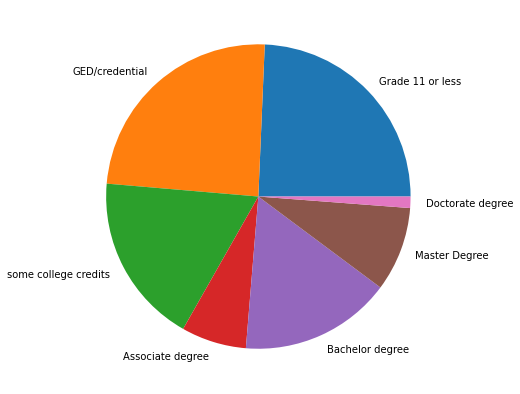

In [8]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
#edu_lables =['14', '17', '19', '20', '21', '23', '24']
edu_lables = ['Grade 11 or less', 'GED/credential', 'some college credits', 'Associate degree', 'Bachelor degree', 'Master Degree', 'Doctorate degree']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(education_data, labels = edu_lables, textprops={'color':"black"})

# show plot
plt.show()

<ipython-input-21-144191ebc4b1>:23: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(income_data, textprops={'color':"w"})


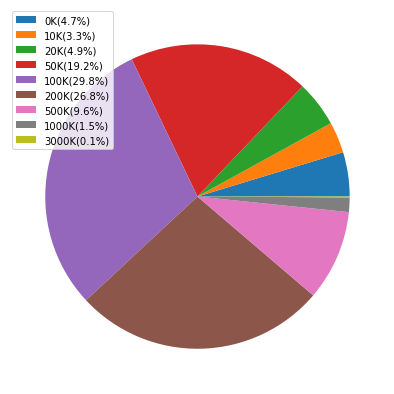

In [21]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
#edu_lables =['14', '17', '19', '20', '21', '23', '24']
format_percent = []
for income in income_data:
    format_percent.append("{0:.1f}%".format( income*100 ))

income_labels = [f'0K({ format_percent[0] })', 
                f'10K({format_percent[1]})', 
                f'20K({format_percent[2]})', 
                f'50K({format_percent[3]})', 
                f'100K({format_percent[4]})', 
                f'200K({format_percent[5]})', 
                f'500K({format_percent[6]})', 
                f'1000K({format_percent[7]})', 
                f'3000K({format_percent[8]})']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(income_data, textprops={'color':"w"})

plt.legend( labels = income_labels, loc="best")
# show plot
plt.show()

In [23]:
print('==============================================================\n')
races = { "1": "White alone",
          "2": "Black or African American alone",
          "3": "American Indian alone",
          "4": "Alaska Native alone",
          "5": "American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races",
          "6": "Asian alone",
          "7": "Native Hawaiian and Other Pacific Islander alone",
          "8": "Some other race alone",
          "9": "Two or More Races"
        }
print(races)
race_data = []

for i in range(1, 10):
    df_race = df.loc[df_valid['RAC1P'] == str(i)]
    count_race = df_race.shape[0]

    race_data.append(count_race/count_total)

    output_str = 'race: {}, total count: {}, percentage: {}'.format(i, count_race, count_race/count_total)
    print(output_str)


{'1': 'White alone', '2': 'Black or African American alone', '3': 'American Indian alone', '4': 'Alaska Native alone', '5': 'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races', '6': 'Asian alone', '7': 'Native Hawaiian and Other Pacific Islander alone', '8': 'Some other race alone', '9': 'Two or More Races'}
race: 1, total count: 2501186, percentage: 0.7720777440831325
race: 2, total count: 303874, percentage: 0.09380124165316686
race: 3, total count: 26789, percentage: 0.008269353293294875
race: 4, total count: 2027, percentage: 0.0006257038010194002
race: 5, total count: 4400, percentage: 0.0013582124935793592
race: 6, total count: 179533, percentage: 0.05541908263858707
race: 7, total count: 5334, percentage: 0.0016465239638073412
race: 8, total count: 115099, percentage: 0.03552929540874788
race: 9, total count: 101310, percentage: 0.03127284266466474


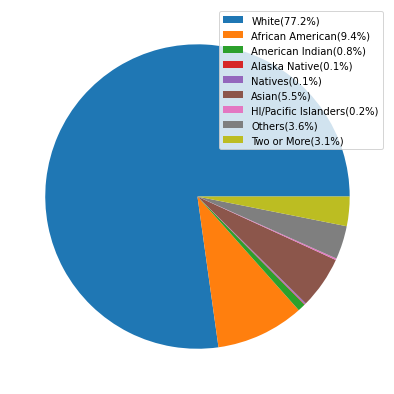

In [26]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np

# Creating dataset
#edu_lables =['14', '17', '19', '20', '21', '23', '24']

format_percent = []
for rd in race_data:
    format_percent.append("{0:.1f}%".format( rd*100 ))

race_labels =[f'White({format_percent[0]})',  
              f'African American({format_percent[1]})', 
              f'American Indian({format_percent[2]})', 
              f'Alaska Native({format_percent[3]})', 
              f'Natives({format_percent[4]})', 
              f'Asian({format_percent[5]})', 
              f'HI/Pacific Islanders({format_percent[6]})', 
              f'Others({format_percent[7]})', 
              f'Two or More({format_percent[8]})']

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(race_data, textprops={'color':"w"})

plt.legend(labels = race_labels, loc='best')
# showplot
plt.show()

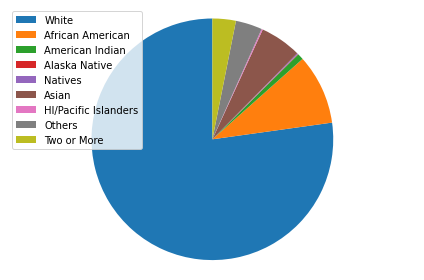

In [41]:
from matplotlib import pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
race_labels =['White', 'African American', 'American Indian', 'Alaska Native', 'Natives', 'Asian', 'HI/Pacific Islanders', 'Others', 'Two or More']

patches, texts = plt.pie(race_data, startangle=90)
plt.legend(patches, race_labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()